### Hello! Gonna try to use LODES data. Idk anything. We'll see.


###### Find relevant links to this project below 

Find the data here -> https://lehd.ces.census.gov/data/
Structure of these data -> https://lehd.ces.census.gov/data/lodes/LODES8/LODESTechDoc8.1.pdf

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot
import geopandas

import geodatasets
import contextily as cx

import pydeck

import h3pandas
import h3
import geojson
import datetime

import folium
import folium.plugins as plugins
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime, TimeSliderChoropleth

from geojson import Feature, Point, FeatureCollection
import json

#LODES_df_2010 = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_od_main_JT00_2010.csv.gz')
LODES_df_2010 = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_od_main_JT00_2019.csv.gz')
#LODES_df_2010 = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_od_main_JT00_2002.csv.gz')
LODES_crosswalk_df = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_xwalk.csv.gz') #### this is the geo reference for those funky numbers.
#"C:\Users\aaron\Code\Data\LODES_Data\wa_od_main_JT00_2010.csv.gz"

pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

C:\Users\aaron\AppData\Local\Temp\ipykernel_26136\973698152.py:26: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  LODES_crosswalk_df = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_xwalk.csv.gz') #### this is the geo reference for those funky numbers.


In [2]:
#LODES_df
LODES_df_2010

w_geocode        h_geocode  S000  SA01  SA02  SA03  SE01  SE02  \
0        530019501001000  530019501002048     1     1     0     0     0     0   
1        530019501001000  530019504002039     1     0     1     0     0     0   
2        530019501001000  530630108001020     1     0     0     1     0     0   
3        530019501001011  530019501003028     1     0     0     1     0     1   
4        530019501001011  530479707005009     1     0     0     1     0     0   
...                  ...              ...   ...   ...   ...   ...   ...   ...   
2801842  530779400081041  530770032002000     1     0     0     1     1     0   
2801843  530779400081041  530779400052037     1     0     1     0     0     1   
2801844  530779400081041  530779400061034     1     0     1     0     0     1   
2801845  530779400081041  530779400071027     1     1     0     0     1     0   
2801846  530779400081041  530779400071042     1     0     1     0     0     1   

         SE03  SI01  SI02  SI03  createdate  
0           1     1     0     0    20230321  
1           1     1     0     0    20230321  
2           1     1     0     0    20230321  
3           0     1     0     0    20230321  
4           1     1     0     0    20230321  
...       ...   ...   ...   ...         ...  
2801842     0     0     1     0    20230321  
2801843     0     0     0     1    20230321  
2801844     0     0     0     1    20230321  
2801845     0     0     0     1    20230321  
2801846     0     0     0     1    20230321  

[2801847 rows x 13 columns]

In [3]:
LODES_crosswalk_df.head(3)
#LODES_crosswalk_df.info()

tabblk2020  st stusps      stname    cty             ctyname  \
0  530330328001007  53     WA  Washington  53033     King County, WA   
1  530350919002023  53     WA  Washington  53035   Kitsap County, WA   
2  530099400001000  53     WA  Washington  53009  Clallam County, WA   

          trct            trctname          bgrp                     bgrpname  \
0  53033032800      328 (King, WA)  530330328001      1 (Tract 328, King, WA)   
1  53035091900    919 (Kitsap, WA)  530350919002    2 (Tract 919, Kitsap, WA)   
2  53009940000  9400 (Clallam, WA)  530099400001  1 (Tract 9400, Clallam, WA)   

    cbsa                               cbsaname   zcta  zctaname    stplc  \
0  42660            Seattle-Tacoma-Bellevue, WA  98065   98065.0  9999999   
1  14740  Bremerton-Silverdale-Port Orchard, WA  98311   98311.0  5372205   
2  38820                       Port Angeles, WA  99999       NaN  9999999   

          stplcname     ctycsub                             ctycsubname  \
0               NaN  5303393078        Snoqualmie Valley CCD (King, WA)   
1  Tracyton CDP, WA  5303590288              Bremerton CCD (Kitsap, WA)   
2               NaN  5300990576  Clallam Bay-Neah Bay CCD (Clallam, WA)   

   stcd116 stcd116name  stsldl                   stsldlname  stsldu  \
0     5301       WA-01   53005   State House District 5, WA   53005   
1     5306       WA-06   53023  State House District 23, WA   53023   
2     5306       WA-06   53024  State House District 24, WA   53024   

                     stslduname  stschool  \
0   State Senate District 5, WA   5308040   
1  State Senate District 23, WA   5301080   
2  State Senate District 24, WA   5300840   

                            stschoolname  stsecon  stseconname   trib  \
0  Snoqualmie Valley School District, WA  9999999          NaN  99999   
1     Central Kitsap School District, WA  9999999          NaN  99999   
2      Cape Flattery School District, WA  9999999          NaN  99999   

  tribname     tsub tsubname   stanrc  stanrcname  necta  nectaname  mil  \
0      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
1      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
2      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   

  milname     stwib                   stwibname   blklatdd    blklondd  \
0     NaN  53000005  05 Seattle/King County WIB  47.601273 -121.749076   
1     NaN  53000001              01 Olympic WIB  47.607775 -122.650540   
2     NaN  53000001              01 Olympic WIB  48.374481 -124.591249   

   createdate  
0    20231016  
1    20231016  
2    20231016

In [4]:
### convert to a GDF
gdf_employment = geopandas.GeoDataFrame(
    LODES_crosswalk_df, 
    geometry = geopandas.points_from_xy(LODES_crosswalk_df.blklondd, LODES_crosswalk_df.blklatdd), 
    crs="EPSG:4326")

In [5]:
### combine the 'crosswalk' with the actual data

comb_df_employment = pd.merge(left = gdf_employment, right = LODES_df_2010, left_on = 'tabblk2020', right_on = 'w_geocode', how = 'inner')
comb_df_residence = pd.merge(left = gdf_employment, right = LODES_df_2010, left_on = 'tabblk2020', right_on = 'h_geocode', how = 'inner')

In [6]:
gdf_employment.head(2)

tabblk2020  st stusps      stname    cty            ctyname  \
0  530330328001007  53     WA  Washington  53033    King County, WA   
1  530350919002023  53     WA  Washington  53035  Kitsap County, WA   

          trct          trctname          bgrp                   bgrpname  \
0  53033032800    328 (King, WA)  530330328001    1 (Tract 328, King, WA)   
1  53035091900  919 (Kitsap, WA)  530350919002  2 (Tract 919, Kitsap, WA)   

    cbsa                               cbsaname   zcta  zctaname    stplc  \
0  42660            Seattle-Tacoma-Bellevue, WA  98065   98065.0  9999999   
1  14740  Bremerton-Silverdale-Port Orchard, WA  98311   98311.0  5372205   

          stplcname     ctycsub                       ctycsubname  stcd116  \
0               NaN  5303393078  Snoqualmie Valley CCD (King, WA)     5301   
1  Tracyton CDP, WA  5303590288        Bremerton CCD (Kitsap, WA)     5306   

  stcd116name  stsldl                   stsldlname  stsldu  \
0       WA-01   53005   State House District 5, WA   53005   
1       WA-06   53023  State House District 23, WA   53023   

                     stslduname  stschool  \
0   State Senate District 5, WA   5308040   
1  State Senate District 23, WA   5301080   

                            stschoolname  stsecon  stseconname   trib  \
0  Snoqualmie Valley School District, WA  9999999          NaN  99999   
1     Central Kitsap School District, WA  9999999          NaN  99999   

  tribname     tsub tsubname   stanrc  stanrcname  necta  nectaname  mil  \
0      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
1      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   

  milname     stwib                   stwibname   blklatdd    blklondd  \
0     NaN  53000005  05 Seattle/King County WIB  47.601273 -121.749076   
1     NaN  53000001              01 Olympic WIB  47.607775 -122.650540   

   createdate                     geometry  
0    20231016  POINT (-121.74908 47.60127)  
1    20231016  POINT (-122.65054 47.60777)

In [7]:
#### Make a third dataframe that has the lat/long of both the home location and work location

temp_geos_df = pd.merge(left = gdf_employment[['tabblk2020', 'ctyname','trctname','cbsaname', 'stplcname','ctycsubname', 'blklatdd','blklondd', 'geometry']], 
                        right = LODES_df_2010[['w_geocode', 'h_geocode', 'S000']], left_on = 'tabblk2020', right_on = 'h_geocode', how = 'inner')

temp_geos_df = temp_geos_df.rename(columns={'blklatdd': 'home_lat', 'blklondd': 'home_long'})

#both_geos_df = pd.merge(left = gdf_employment[['blklatdd','blklondd']], right = temp_geos_df, left_on = 'tabblk2020', right_on = '')

In [8]:
#both_geos_df = both_geos_df.rename(columns={'blklatdd': 'home_lat', 'blklondd': 'home_long'})

temp_geos_df.head(3)

tabblk2020          ctyname        trctname  \
0  530330328001007  King County, WA  328 (King, WA)   
1  530330328001007  King County, WA  328 (King, WA)   
2  530330328001007  King County, WA  328 (King, WA)   

                      cbsaname stplcname                       ctycsubname  \
0  Seattle-Tacoma-Bellevue, WA       NaN  Snoqualmie Valley CCD (King, WA)   
1  Seattle-Tacoma-Bellevue, WA       NaN  Snoqualmie Valley CCD (King, WA)   
2  Seattle-Tacoma-Bellevue, WA       NaN  Snoqualmie Valley CCD (King, WA)   

    home_lat   home_long                     geometry        w_geocode  \
0  47.601273 -121.749076  POINT (-121.74908 47.60127)  530330237012020   
1  47.601273 -121.749076  POINT (-121.74908 47.60127)  530330322111005   
2  47.601273 -121.749076  POINT (-121.74908 47.60127)  530610401002008   

         h_geocode  S000  
0  530330328001007     1  
1  530330328001007     1  
2  530330328001007     1

In [9]:
#comb_df_residence.head(2)

In [10]:
comb_df_employment.head(2)

tabblk2020  st stusps      stname    cty             ctyname  \
0  530630004003005  53     WA  Washington  53063  Spokane County, WA   
1  530630004003005  53     WA  Washington  53063  Spokane County, WA   

          trct         trctname          bgrp                  bgrpname  \
0  53063000400  4 (Spokane, WA)  530630004003  3 (Tract 4, Spokane, WA)   
1  53063000400  4 (Spokane, WA)  530630004003  3 (Tract 4, Spokane, WA)   

    cbsa                    cbsaname   zcta  zctaname    stplc  \
0  44060  Spokane-Spokane Valley, WA  99208   99208.0  5367000   
1  44060  Spokane-Spokane Valley, WA  99208   99208.0  5367000   

          stplcname     ctycsub                ctycsubname  stcd116  \
0  Spokane city, WA  5306393200  Spokane CCD (Spokane, WA)     5305   
1  Spokane city, WA  5306393200  Spokane CCD (Spokane, WA)     5305   

  stcd116name  stsldl                  stsldlname  stsldu  \
0       WA-05   53003  State House District 3, WA   53003   
1       WA-05   53003  State House District 3, WA   53003   

                    stslduname  stschool                stschoolname  stsecon  \
0  State Senate District 3, WA   5308250  Spokane Public Schools, WA  9999999   
1  State Senate District 3, WA   5308250  Spokane Public Schools, WA  9999999   

   stseconname   trib tribname     tsub tsubname   stanrc  stanrcname  necta  \
0          NaN  99999      NaN  9999999      NaN  9999999         NaN  99999   
1          NaN  99999      NaN  9999999      NaN  9999999         NaN  99999   

   nectaname  mil milname     stwib       stwibname   blklatdd    blklondd  \
0        NaN  NaN     NaN  53000012  12 Spokane WIB  47.714227 -117.411179   
1        NaN  NaN     NaN  53000012  12 Spokane WIB  47.714227 -117.411179   

   createdate_x                     geometry        w_geocode  \
0      20231016  POINT (-117.41118 47.71423)  530630004003005   
1      20231016  POINT (-117.41118 47.71423)  530630004003005   

         h_geocode  S000  SA01  SA02  SA03  SE01  SE02  SE03  SI01  SI02  \
0  530630003021007     1     0     1     0     0     1     0     0     0   
1  530630004002030     1     1     0     0     1     0     0     0     0   

   SI03  createdate_y  
0     1      20230321  
1     1      20230321

In [11]:
seatac_employment_frame = comb_df_employment[comb_df_employment['cbsaname'] == 'Seattle-Tacoma-Bellevue, WA']
seatac_residence_frame = comb_df_residence[comb_df_residence['cbsaname'] == 'Seattle-Tacoma-Bellevue, WA']

In [12]:
seatac_employment_frame.head()

tabblk2020  st stusps      stname    cty               ctyname  \
169  530610414004002  53     WA  Washington  53061  Snohomish County, WA   
170  530610414004002  53     WA  Washington  53061  Snohomish County, WA   
171  530610414004002  53     WA  Washington  53061  Snohomish County, WA   
172  530610414004002  53     WA  Washington  53061  Snohomish County, WA   
173  530610414004002  53     WA  Washington  53061  Snohomish County, WA   

            trct             trctname          bgrp  \
169  53061041400  414 (Snohomish, WA)  530610414004   
170  53061041400  414 (Snohomish, WA)  530610414004   
171  53061041400  414 (Snohomish, WA)  530610414004   
172  53061041400  414 (Snohomish, WA)  530610414004   
173  53061041400  414 (Snohomish, WA)  530610414004   

                         bgrpname   cbsa                     cbsaname   zcta  \
169  4 (Tract 414, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA  98203   
170  4 (Tract 414, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA  98203   
171  4 (Tract 414, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA  98203   
172  4 (Tract 414, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA  98203   
173  4 (Tract 414, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA  98203   

     zctaname    stplc         stplcname     ctycsub  \
169   98203.0  5322640  Everett city, WA  5306191120   
170   98203.0  5322640  Everett city, WA  5306191120   
171   98203.0  5322640  Everett city, WA  5306191120   
172   98203.0  5322640  Everett city, WA  5306191120   
173   98203.0  5322640  Everett city, WA  5306191120   

                     ctycsubname  stcd116 stcd116name  stsldl  \
169  Everett CCD (Snohomish, WA)     5302       WA-02   53038   
170  Everett CCD (Snohomish, WA)     5302       WA-02   53038   
171  Everett CCD (Snohomish, WA)     5302       WA-02   53038   
172  Everett CCD (Snohomish, WA)     5302       WA-02   53038   
173  Everett CCD (Snohomish, WA)     5302       WA-02   53038   

                      stsldlname  stsldu                    stslduname  \
169  State House District 38, WA   53038  State Senate District 38, WA   
170  State House District 38, WA   53038  State Senate District 38, WA   
171  State House District 38, WA   53038  State Senate District 38, WA   
172  State House District 38, WA   53038  State Senate District 38, WA   
173  State House District 38, WA   53038  State Senate District 38, WA   

     stschool                 stschoolname  stsecon  stseconname   trib  \
169   5302670  Everett School District, WA  9999999          NaN  99999   
170   5302670  Everett School District, WA  9999999          NaN  99999   
171   5302670  Everett School District, WA  9999999          NaN  99999   
172   5302670  Everett School District, WA  9999999          NaN  99999   
173   5302670  Everett School District, WA  9999999          NaN  99999   

    tribname     tsub tsubname   stanrc  stanrcname  necta  nectaname  mil  \
169      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
170      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
171      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
172      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
173      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   

    milname     stwib                stwibname   blklatdd    blklondd  \
169     NaN  53000004  04 Snohomish County WIB  47.941831 -122.206053   
170     NaN  53000004  04 Snohomish County WIB  47.941831 -122.206053   
171     NaN  53000004  04 Snohomish County WIB  47.941831 -122.206053   
172     NaN  53000004  04 Snohomish County WIB  47.941831 -122.206053   
173     NaN  53000004  04 Snohomish County WIB  47.941831 -122.206053   

     createdate_x                     geometry        w_geocode  \
169      20231016  POINT (-122.20605 47.94183)  530610414004002   
170      20231016  POINT (-122.20605 47.94183)  530610414004002   
171     

In [13]:
seatac_employment_hexes = seatac_employment_frame.h3.geo_to_h3_aggregate(8)
seatac_residence_hexes = seatac_residence_frame.h3.geo_to_h3_aggregate(8)


C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)
C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


In [14]:
seatac_employment_hexes.head()

tabblk2020    st      cty           trct  \
h3_08                                                              
8828d00435fffff   5306105370020250   530   530610   530610537000   
8828d00959fffff    530610537001000    53    53061    53061053700   
8828d00e81fffff  65795706588129498  6572  6579564  6579570658800   
8828d00e83fffff  13265263425026075  1325  1326525  1326526342500   
8828d00e85fffff   7959158055015420   795   795915   795915805500   

                           bgrp     cbsa      zcta    zctaname      stplc  \
h3_08                                                                       
8828d00435fffff   5306105370020   426600    982230    982230.0   99999990   
8828d00959fffff    530610537001    42660     98241     98241.0    9999999   
8828d00e81fffff  65795706588124  5289840  12181884  12181884.0  659269560   
8828d00e83fffff  13265263425025  1066500   2456025   2456025.0  132917250   
8828d00e85fffff   7959158055015   639900   1473615   1473615.0   79750350   

                      ctycsub  stcd116   stsldl   stsldu   stschool  \
h3_08                                                                 
8828d00435fffff   53061908390    53010   530390   530390   53019800   
8828d00959fffff    5306190839     5301    53039    53039    5301980   
8828d00e81fffff  657967664036   657324  6576836  6576836  657445520   
8828d00e83fffff  132654770975   132525  1325975  1325975  132549500   
8828d00e85fffff   79592862585    79515   795585   795585   79529700   

                    stsecon  stseconname        tsub      stanrc  stanrcname  \
h3_08                                                                          
8828d00435fffff    99999990          0.0    99999990    99999990         0.0   
8828d00959fffff     9999999          0.0     9999999     9999999         0.0   
8828d00e81fffff  1239999876          0.0  1239999876  1239999876         0.0   
8828d00e83fffff   249999975          0.0   249999975   249999975         0.0   
8828d00e85fffff   149999985          0.0   149999985   149999985         0.0   

                    necta  nectaname  mil       stwib     blklatdd  \
h3_08                                                                
8828d00435fffff    999990        0.0  0.0   530000040   482.106475   
8828d00959fffff     99999        0.0  0.0    53000004    48.215139   
8828d00e81fffff  12399876        0.0  0.0  6572000496  5984.029877   
8828d00e83fffff   2499975        0.0  0.0  1325000100  1206.560425   
8828d00e85fffff   1499985        0.0  0.0   795000060   723.851910   

                     blklondd  createdate_x          w_geocode  \
h3_08                                                            
8828d00435fffff  -1217.070240     202310160   5306105370020250   
8828d00959fffff   -121.278084      20231016    530610537001000   
8828d00e81fffff -15078.817722    2508645984  65795706588129498   
8828d00e83fffff  -3040.215553     505775400  13265263425026075   
8828d00e85fffff  -1823.962815     303465240   7959158055015420   

                         h_geocode  S000  SA01  SA02  SA03  SE01  SE02  SE03  \
h3_08                                                                          
8828d00435fffff   5305543128278093    10     2     4     4     1     3     6   
8828d00959fffff    530610537002056     1     0     1     0     1     0     0   
8828d00e81fffff  65791934836918935   144    14    80    50    43    51    50   
8828d00e83fffff  13264646083407658    30    10    11     9    15    14     1   
8828d00e85fffff   7959078225134551    16     9     6     1     7     5     4   

                 SI01  SI02  SI03  createdate_y  \
h3_08                                             
8828d00435fffff    10     0     0     202303210   
8828d00959fffff     1     0     0      20230321   
8828d00e81fffff     7    16   121    2508559804   
8828d00e83fffff     0    27     3     505758025   
8828d00e85fffff     0     0    16     303454815   

                                                          geometry  
h3_08 

In [15]:
#geodatasets.data

In [16]:
#seattle_outline = geodatasets.get_path('geoda seattle1')## this creates a file and saves the path string

In [17]:
#seattle_outline_frame = geopandas.read_file(seattle_outline)

In [18]:
#seattle_outline_frame.explore()

In [19]:

#mountlake_terrace_outline = seattle_outline_frame[(seattle_outline_frame['FIPS'] == '53061051000') | (seattle_outline_frame['FIPS'] == '53061051100') | (seattle_outline_frame['FIPS'] == '53061051200') | (seattle_outline_frame['FIPS'] == '53061051300')]
#single_fip = seattle_outline_frame[seattle_outline_frame['FIPS'] == '53061051200']


In [20]:
#mountlake_terrace_outline.explore()

Text(0.5, 1.0, 'Seatac CSA Residences by Hexagon, Log Scale')

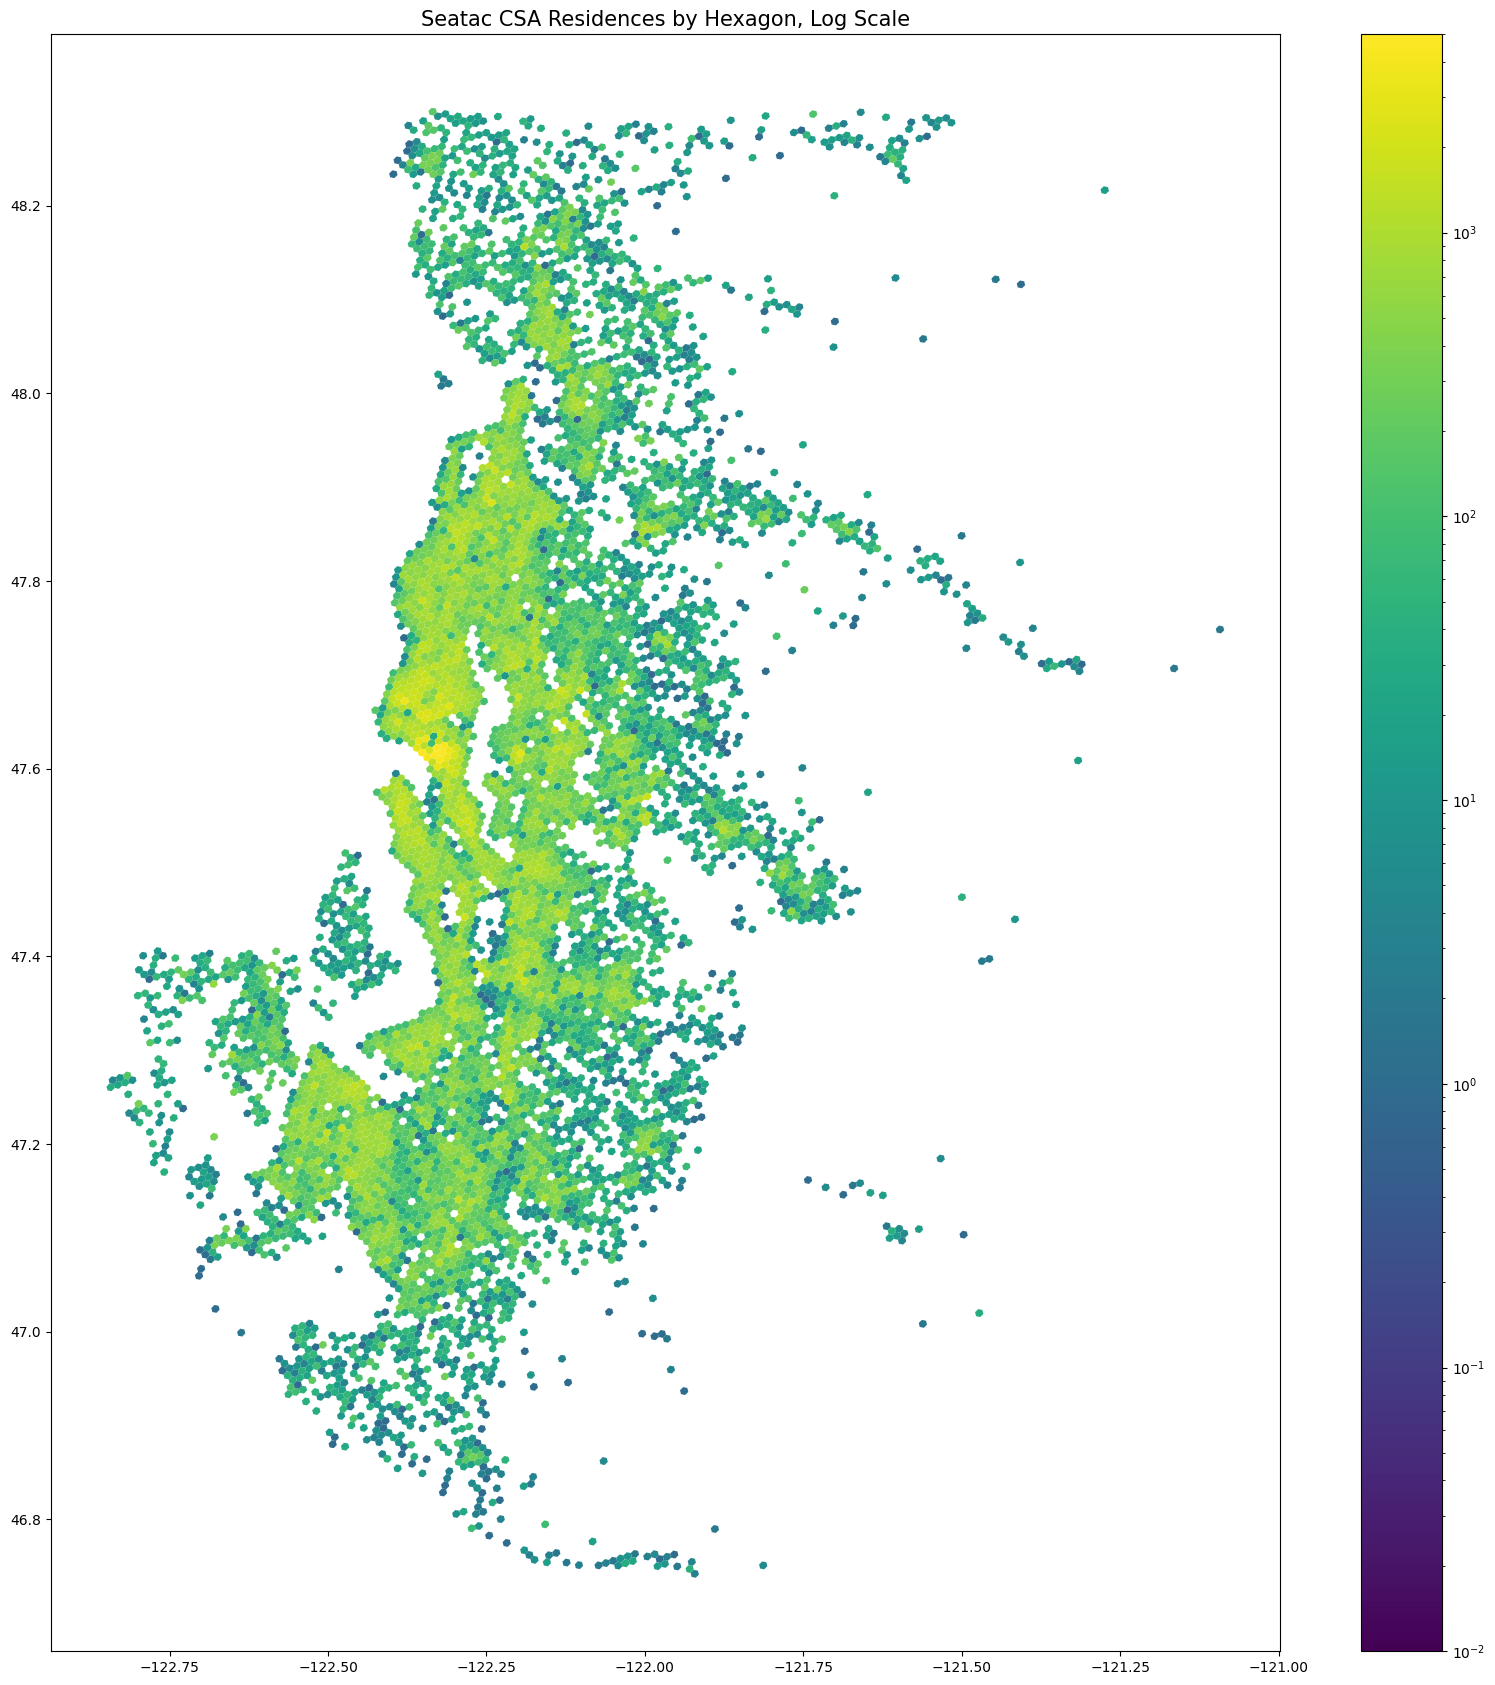

In [21]:
#seatac_residence_hexes.plot(column = 'S000')

fig, ax = matplotlib.pyplot.subplots(figsize  = (21, 21))

seatac_residence_hexes.plot(column = 'S000',
                legend = True,
                norm=plt.colors.LogNorm(vmin = 0.01, vmax = 5000),
                ax = ax)

ax.set_title("Seatac CSA Residences by Hexagon, Log Scale", fontsize=15)

Text(0.5, 1.0, 'SeaTac CSA Employment by Hexagon, Log Scale')

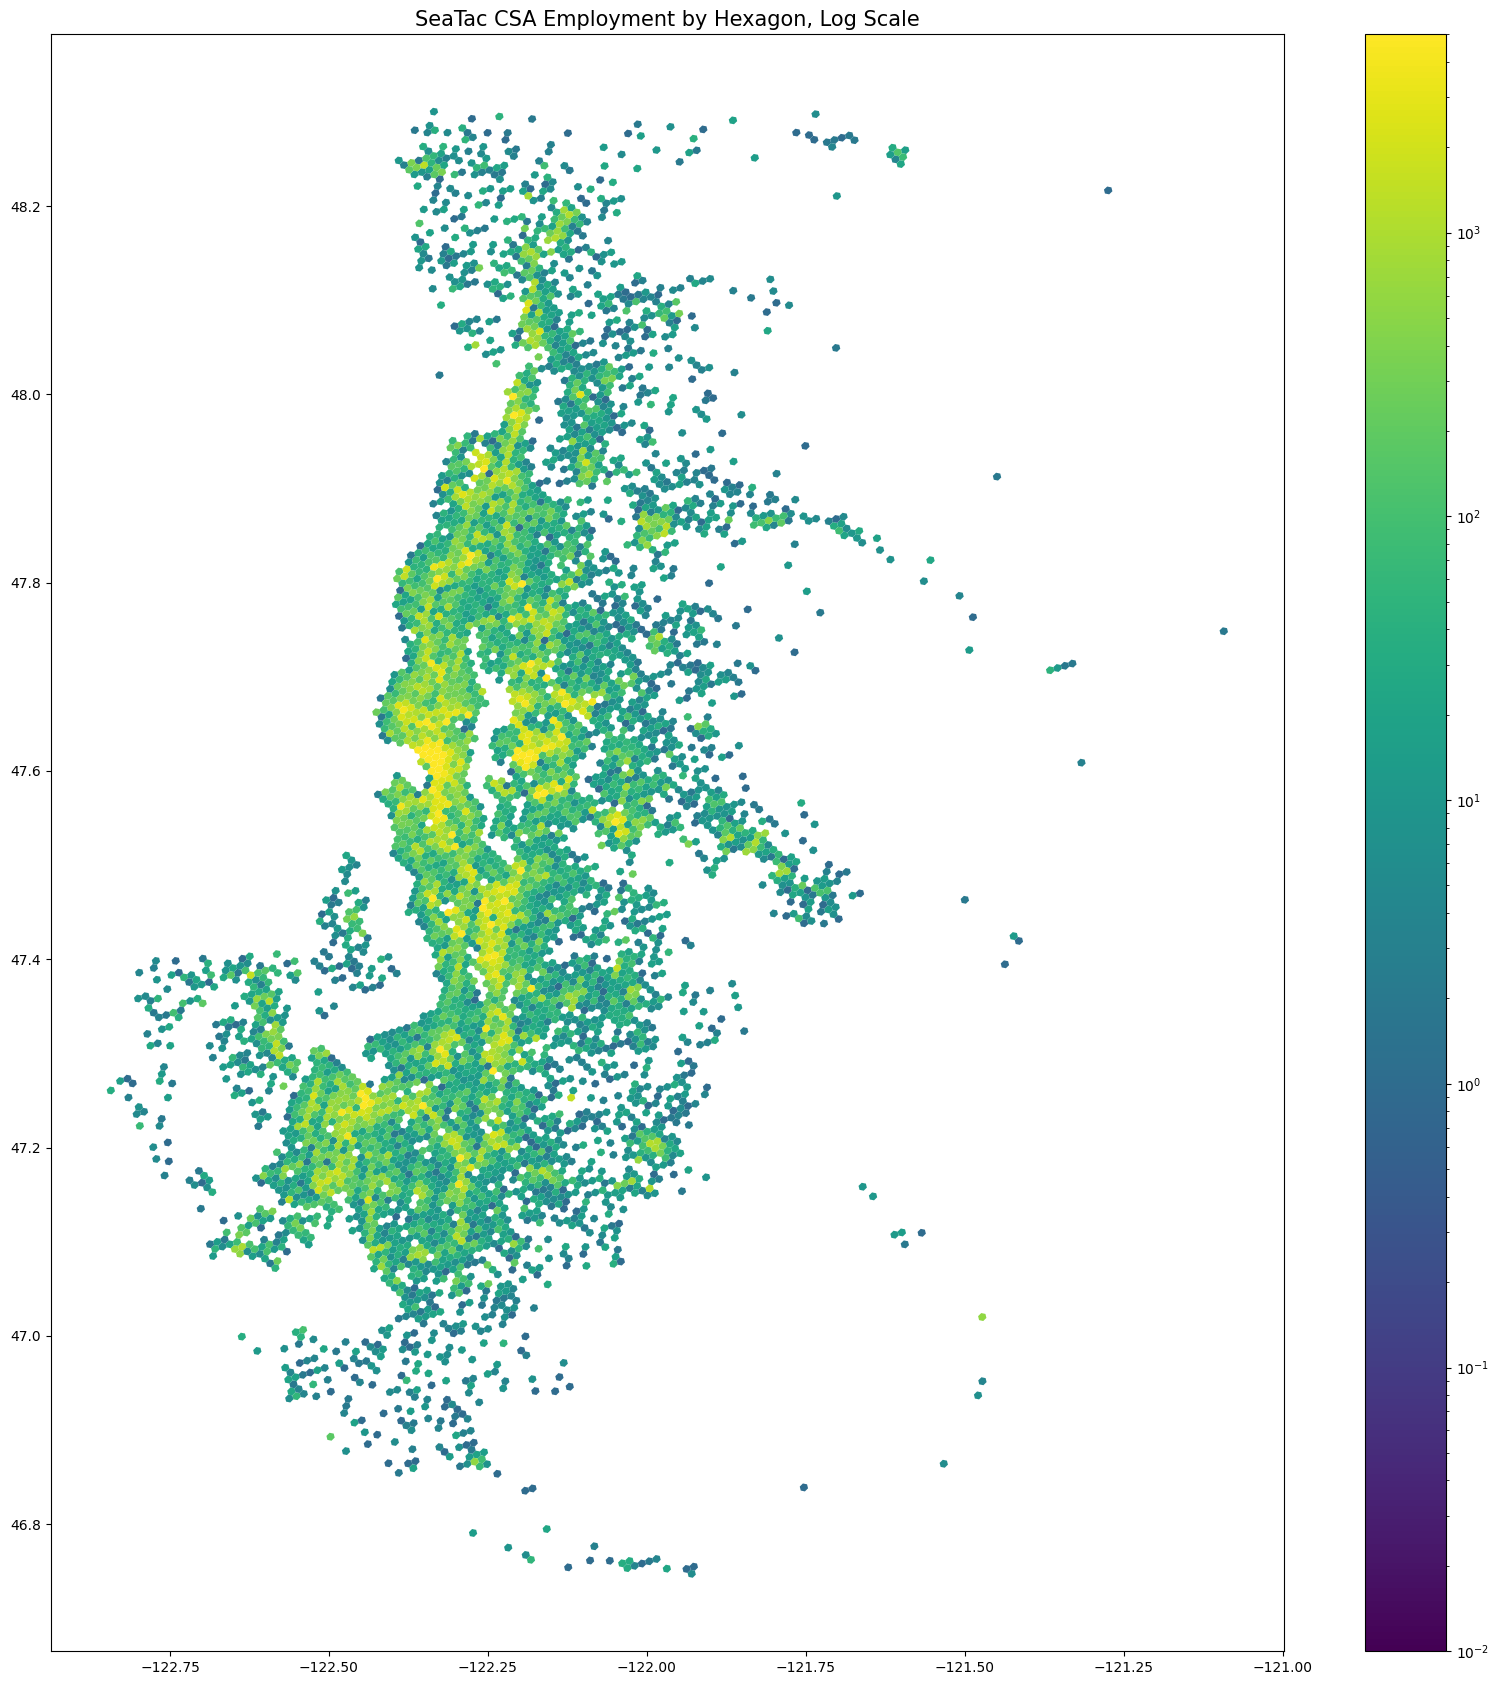

In [22]:
#tt = {'S000'}

#seatac_employment_hexes.plot(column = 'S000')

fig, ax = matplotlib.pyplot.subplots(figsize  = (21, 21))

seatac_employment_hexes.plot(column = 'S000',
                legend = True,
                norm=plt.colors.LogNorm(vmin = 0.01, vmax = 5000),
                ax = ax)

ax.set_title("SeaTac CSA Employment by Hexagon, Log Scale", fontsize=15)

In [23]:
#### Ok now I am going to try to make a dataframe for the residences of all seattle workers

#### First make a frame with all the residences in the state of washington

#### Second make a frame keeping only those employed in Seattle

#### Third take the above frame, and get the geometry for all the residences of those people.

In [24]:
comb_df_employment.head()

tabblk2020  st stusps      stname    cty             ctyname  \
0  530630004003005  53     WA  Washington  53063  Spokane County, WA   
1  530630004003005  53     WA  Washington  53063  Spokane County, WA   
2  530630004003005  53     WA  Washington  53063  Spokane County, WA   
3  530630004003005  53     WA  Washington  53063  Spokane County, WA   
4  530630004003005  53     WA  Washington  53063  Spokane County, WA   

          trct         trctname          bgrp                  bgrpname  \
0  53063000400  4 (Spokane, WA)  530630004003  3 (Tract 4, Spokane, WA)   
1  53063000400  4 (Spokane, WA)  530630004003  3 (Tract 4, Spokane, WA)   
2  53063000400  4 (Spokane, WA)  530630004003  3 (Tract 4, Spokane, WA)   
3  53063000400  4 (Spokane, WA)  530630004003  3 (Tract 4, Spokane, WA)   
4  53063000400  4 (Spokane, WA)  530630004003  3 (Tract 4, Spokane, WA)   

    cbsa                    cbsaname   zcta  zctaname    stplc  \
0  44060  Spokane-Spokane Valley, WA  99208   99208.0  5367000   
1  44060  Spokane-Spokane Valley, WA  99208   99208.0  5367000   
2  44060  Spokane-Spokane Valley, WA  99208   99208.0  5367000   
3  44060  Spokane-Spokane Valley, WA  99208   99208.0  5367000   
4  44060  Spokane-Spokane Valley, WA  99208   99208.0  5367000   

          stplcname     ctycsub                ctycsubname  stcd116  \
0  Spokane city, WA  5306393200  Spokane CCD (Spokane, WA)     5305   
1  Spokane city, WA  5306393200  Spokane CCD (Spokane, WA)     5305   
2  Spokane city, WA  5306393200  Spokane CCD (Spokane, WA)     5305   
3  Spokane city, WA  5306393200  Spokane CCD (Spokane, WA)     5305   
4  Spokane city, WA  5306393200  Spokane CCD (Spokane, WA)     5305   

  stcd116name  stsldl                  stsldlname  stsldu  \
0       WA-05   53003  State House District 3, WA   53003   
1       WA-05   53003  State House District 3, WA   53003   
2       WA-05   53003  State House District 3, WA   53003   
3       WA-05   53003  State House District 3, WA   53003   
4       WA-05   53003  State House District 3, WA   53003   

                    stslduname  stschool                stschoolname  stsecon  \
0  State Senate District 3, WA   5308250  Spokane Public Schools, WA  9999999   
1  State Senate District 3, WA   5308250  Spokane Public Schools, WA  9999999   
2  State Senate District 3, WA   5308250  Spokane Public Schools, WA  9999999   
3  State Senate District 3, WA   5308250  Spokane Public Schools, WA  9999999   
4  State Senate District 3, WA   5308250  Spokane Public Schools, WA  9999999   

   stseconname   trib tribname     tsub tsubname   stanrc  stanrcname  necta  \
0          NaN  99999      NaN  9999999      NaN  9999999         NaN  99999   
1          NaN  99999      NaN  9999999      NaN  9999999         NaN  99999   
2          NaN  99999      NaN  9999999      NaN  9999999         NaN  99999   
3          NaN  99999      NaN  9999999      NaN  9999999         NaN  99999   
4          NaN  99999      NaN  9999999      NaN  9999999         NaN  99999   

   nectaname  mil milname     stwib       stwibname   blklatdd    blklondd  \
0        NaN  NaN     NaN  53000012  12 Spokane WIB  47.714227 -117.411179   
1        NaN  NaN     NaN  53000012  12 Spokane WIB  47.714227 -117.411179   
2        NaN  NaN     NaN  53000012  12 Spokane WIB  47.714227 -117.411179   
3        NaN  NaN     NaN  53000012  12 Spokane WIB  47.714227 -117.411179   
4        NaN  NaN     NaN  53000012  12 Spokane WIB  47.714227 -117.411179   

   createdate_x                     geometry        w_geocode  \
0      20231016  POINT (-117.41118 47.71423)  530630004003005   
1      20231016  POINT (-117.41118 47.71423)  530630004003005   
2      20231016  POINT (-117.41118 47.71423)  530630004003005   
3      20231016  POINT (-117.41118 47.71423)  530630004003005   
4      20231016  POINT (-117.41118 47.71423)  530630004003005   

         h_geocode  S000  SA01  SA02  SA03  SE01  SE02  SE03  SI01  SI02  \
0  530630003021007     1     

In [25]:
comb_df_employment_not_null = comb_df_employment.dropna(subset=['stplcname'])

### people who work in seattle
seattle_geo_employees_frame = comb_df_employment_not_null[comb_df_employment_not_null['stplcname'].str.startswith('Seattle')]

seattle_geo_employees_frame.tail(2)

tabblk2020  st stusps      stname    cty          ctyname  \
2534449  530330104012008  53     WA  Washington  53033  King County, WA   
2534450  530330104024016  53     WA  Washington  53033  King County, WA   

                trct           trctname          bgrp  \
2534449  53033010401  104.01 (King, WA)  530330104012   
2534450  53033010402  104.02 (King, WA)  530330104024   

                           bgrpname   cbsa                     cbsaname  \
2534449  2 (Tract 104.01, King, WA)  42660  Seattle-Tacoma-Bellevue, WA   
2534450  4 (Tract 104.02, King, WA)  42660  Seattle-Tacoma-Bellevue, WA   

          zcta  zctaname    stplc         stplcname     ctycsub  \
2534449  98108   98108.0  5363000  Seattle city, WA  5303392928   
2534450  98108   98108.0  5363000  Seattle city, WA  5303392928   

                    ctycsubname  stcd116 stcd116name  stsldl  \
2534449  Seattle CCD (King, WA)     5309       WA-09   53037   
2534450  Seattle CCD (King, WA)     5309       WA-09   53011   

                          stsldlname  stsldu                    stslduname  \
2534449  State House District 37, WA   53037  State Senate District 37, WA   
2534450  State House District 11, WA   53011  State Senate District 11, WA   

         stschool                stschoolname  stsecon  stseconname   trib  \
2534449   5307710  Seattle Public Schools, WA  9999999          NaN  99999   
2534450   5307710  Seattle Public Schools, WA  9999999          NaN  99999   

        tribname     tsub tsubname   stanrc  stanrcname  necta  nectaname  \
2534449      NaN  9999999      NaN  9999999         NaN  99999        NaN   
2534450      NaN  9999999      NaN  9999999         NaN  99999        NaN   

         mil milname     stwib                   stwibname   blklatdd  \
2534449  NaN     NaN  53000005  05 Seattle/King County WIB  47.556716   
2534450  NaN     NaN  53000005  05 Seattle/King County WIB  47.555230   

           blklondd  createdate_x                     geometry  \
2534449 -122.299789      20231016  POINT (-122.29979 47.55672)   
2534450 -122.314727      20231016  POINT (-122.31473 47.55523)   

               w_geocode        h_geocode  S000  SA01  SA02  SA03  SE01  SE02  \
2534449  530330104012008  530330104012016     1     0     0     1     1     0   
2534450  530330104024016  530330252012002     1     0     1     0     0     0   

         SE03  SI01  SI02  SI03  createdate_y  
2534449     0     0     0     1      20230321  
2534450     1     0     0     1      20230321

In [26]:
seattle_employment_hexes = seattle_geo_employees_frame.h3.geo_to_h3_aggregate(9)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


<Axes: >

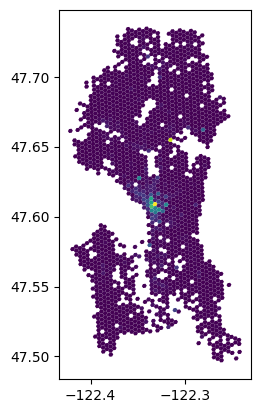

In [27]:
seattle_employment_hexes.plot(column = 'S000')

In [28]:
### Grab just the two relevant columns (residence geolocation and S000)
two_cols = seattle_geo_employees_frame[['h_geocode', 'S000']].copy()

residence_of_seattle_employees_frame = pd.merge(left = gdf_employment, right = two_cols, left_on = 'tabblk2020', right_on = 'h_geocode', how = 'inner')

seattle_employee_residence_hexes = residence_of_seattle_employees_frame.h3.geo_to_h3_aggregate(7)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


In [29]:
seattle_employee_residence_hexes_greater_than = seattle_employee_residence_hexes[seattle_employee_residence_hexes['S000'] > 200]

<Axes: >

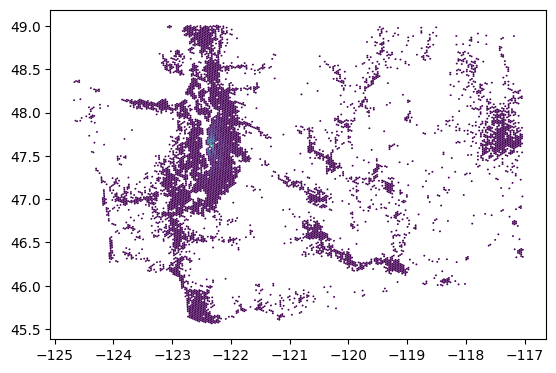

In [30]:
seattle_employee_residence_hexes.plot(column = 'S000')

#### Lets take a look at mountlake terrace!! Why? Idk.

In [31]:
#### Where do mountlake terrace residents work??
comb_df_residence_not_null = comb_df_residence.dropna(subset=['stplcname'])

mountlake_residents_frame = comb_df_residence_not_null[comb_df_residence_not_null['stplcname'].str.startswith('Mountlake')]

#seattle_geo_employees_frame = comb_df_employment_not_null[comb_df_employment_not_null['stplcname'].str.startswith('Seattle')]

#mountlake_residents_frame.head()

In [32]:
mountlake_residents_hexes = mountlake_residents_frame.h3.geo_to_h3_aggregate(10)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


<Axes: >

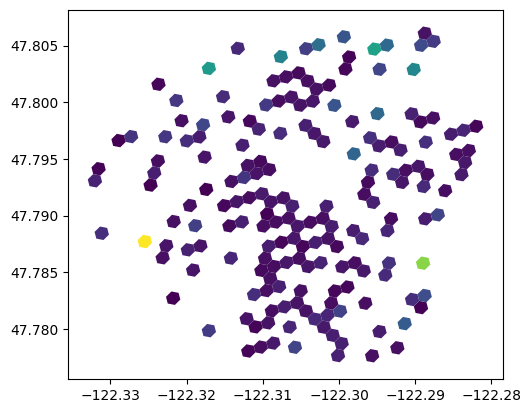

In [33]:
mountlake_residents_hexes.plot(column = 'S000')

In [34]:
mountlake_residents_frame.head()

tabblk2020  st stusps      stname    cty               ctyname  \
95258  530610513011006  53     WA  Washington  53061  Snohomish County, WA   
95259  530610513011006  53     WA  Washington  53061  Snohomish County, WA   
95260  530610513011006  53     WA  Washington  53061  Snohomish County, WA   
95261  530610513011006  53     WA  Washington  53061  Snohomish County, WA   
95262  530610513011006  53     WA  Washington  53061  Snohomish County, WA   

              trct                trctname          bgrp  \
95258  53061051301  513.01 (Snohomish, WA)  530610513011   
95259  53061051301  513.01 (Snohomish, WA)  530610513011   
95260  53061051301  513.01 (Snohomish, WA)  530610513011   
95261  53061051301  513.01 (Snohomish, WA)  530610513011   
95262  53061051301  513.01 (Snohomish, WA)  530610513011   

                              bgrpname   cbsa                     cbsaname  \
95258  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   
95259  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   
95260  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   
95261  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   
95262  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   

        zcta  zctaname    stplc                   stplcname     ctycsub  \
95258  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   
95259  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   
95260  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   
95261  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   
95262  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   

                       ctycsubname  stcd116 stcd116name  stsldl  \
95258  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   
95259  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   
95260  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   
95261  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   
95262  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   

                       stsldlname  stsldu                   stslduname  \
95258  State House District 1, WA   53001  State Senate District 1, WA   
95259  State House District 1, WA   53001  State Senate District 1, WA   
95260  State House District 1, WA   53001  State Senate District 1, WA   
95261  State House District 1, WA   53001  State Senate District 1, WA   
95262  State House District 1, WA   53001  State Senate District 1, WA   

       stschool                 stschoolname  stsecon  stseconname   trib  \
95258   5302400  Edmonds School District, WA  9999999          NaN  99999   
95259   5302400  Edmonds School District, WA  9999999          NaN  99999   
95260   5302400  Edmonds School District, WA  9999999          NaN  99999   
95261   5302400  Edmonds School District, WA  9999999          NaN  99999   
95262   5302400  Edmonds School District, WA  9999999          NaN  99999   

      tribname     tsub tsubname   stanrc  stanrcname  necta  nectaname  mil  \
95258      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
95259      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
95260      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
95261      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
95262      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   

      milname     stwib                stwibname   blklatdd    blklondd  \
95258     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   
95259     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   
95260     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   
95261     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   
95262     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   

       createdate_x

In [35]:
two_cols_mountlake = mountlake_residents_frame[['w_geocode', 'S000']].copy()


workplace_of_mountlake_terrace_residents_frame = pd.merge(left = gdf_employment, right = two_cols_mountlake, left_on = 'tabblk2020', right_on = 'w_geocode', how = 'inner')

In [36]:
workplace_of_mountlake_terrace_residents_hexes = workplace_of_mountlake_terrace_residents_frame.h3.geo_to_h3_aggregate(10)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


In [37]:
tt = {'S000'}

mountlake_terrace_workplaces = workplace_of_mountlake_terrace_residents_hexes.explore(column = 'S000', tooltip = tt)

In [42]:
mountlake_terrace_workplaces

In [59]:
workplace_of_mountlake_terrace_residents_frame.head(1)

tabblk2020  st stusps      stname    cty          ctyname  \
0  530330322231000  53     WA  Washington  53033  King County, WA   

          trct           trctname          bgrp                    bgrpname  \
0  53033032223  322.23 (King, WA)  530330322231  1 (Tract 322.23, King, WA)   

    cbsa                     cbsaname   zcta  zctaname    stplc  \
0  42660  Seattle-Tacoma-Bellevue, WA  98029   98029.0  5361115   

            stplcname     ctycsub                      ctycsubname  stcd116  \
0  Sammamish city, WA  5303391392  Issaquah Plateau CCD (King, WA)     5308   

  stcd116name  stsldl                  stsldlname  stsldu  \
0       WA-08   53005  State House District 5, WA   53005   

                    stslduname  stschool                  stschoolname  \
0  State Senate District 5, WA   5303750  Issaquah School District, WA   

   stsecon  stseconname   trib tribname     tsub tsubname   stanrc  \
0  9999999          NaN  99999      NaN  9999999      NaN  9999999   

   stanrcname  necta  nectaname  mil milname     stwib  \
0         NaN  99999        NaN  NaN     NaN  53000005   

                    stwibname   blklatdd    blklondd  createdate  \
0  05 Seattle/King County WIB  47.563069 -122.019159    20231016   

                      geometry        w_geocode  S000  
0  POINT (-122.01916 47.56307)  530330322231000     1

In [62]:
num_working_in_seatac_cbsa = workplace_of_mountlake_terrace_residents_frame[workplace_of_mountlake_terrace_residents_frame['cbsaname'] == 'Seattle-Tacoma-Bellevue, WA']
num_working_in_seattle = workplace_of_mountlake_terrace_residents_frame[workplace_of_mountlake_terrace_residents_frame['stplcname'] == 'Seattle city, WA']
num_working_in_snohomish = workplace_of_mountlake_terrace_residents_frame[workplace_of_mountlake_terrace_residents_frame['ctyname'] == 'King County, WA']

num_working_in_snohomish.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6673 entries, 0 to 10313
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   tabblk2020    6673 non-null   int64   
 1   st            6673 non-null   int64   
 2   stusps        6673 non-null   object  
 3   stname        6673 non-null   object  
 4   cty           6673 non-null   int64   
 5   ctyname       6673 non-null   object  
 6   trct          6673 non-null   int64   
 7   trctname      6673 non-null   object  
 8   bgrp          6673 non-null   int64   
 9   bgrpname      6673 non-null   object  
 10  cbsa          6673 non-null   int64   
 11  cbsaname      6673 non-null   object  
 12  zcta          6673 non-null   int64   
 13  zctaname      6673 non-null   float64 
 14  stplc         6673 non-null   int64   
 15  stplcname     6655 non-null   object  
 16  ctycsub       6673 non-null   int64   
 17  ctycsubname   6673 non-null   object  
 18 

In [38]:
#mountlake_terrace_workplaces.save('Mountlake_Terrace_2019_Workplaces.html')

#### Ok now I am gonna try to incorporate PyDeck. We'll see how it goes. Docs below

https://deckgl.readthedocs.io/en/latest/gallery/arc_layer.html

In [39]:
mountlake_residents_frame.head()

tabblk2020  st stusps      stname    cty               ctyname  \
95258  530610513011006  53     WA  Washington  53061  Snohomish County, WA   
95259  530610513011006  53     WA  Washington  53061  Snohomish County, WA   
95260  530610513011006  53     WA  Washington  53061  Snohomish County, WA   
95261  530610513011006  53     WA  Washington  53061  Snohomish County, WA   
95262  530610513011006  53     WA  Washington  53061  Snohomish County, WA   

              trct                trctname          bgrp  \
95258  53061051301  513.01 (Snohomish, WA)  530610513011   
95259  53061051301  513.01 (Snohomish, WA)  530610513011   
95260  53061051301  513.01 (Snohomish, WA)  530610513011   
95261  53061051301  513.01 (Snohomish, WA)  530610513011   
95262  53061051301  513.01 (Snohomish, WA)  530610513011   

                              bgrpname   cbsa                     cbsaname  \
95258  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   
95259  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   
95260  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   
95261  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   
95262  1 (Tract 513.01, Snohomish, WA)  42660  Seattle-Tacoma-Bellevue, WA   

        zcta  zctaname    stplc                   stplcname     ctycsub  \
95258  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   
95259  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   
95260  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   
95261  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   
95262  98043   98043.0  5347490  Mountlake Terrace city, WA  5306190992   

                       ctycsubname  stcd116 stcd116name  stsldl  \
95258  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   
95259  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   
95260  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   
95261  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   
95262  Edmonds CCD (Snohomish, WA)     5302       WA-02   53001   

                       stsldlname  stsldu                   stslduname  \
95258  State House District 1, WA   53001  State Senate District 1, WA   
95259  State House District 1, WA   53001  State Senate District 1, WA   
95260  State House District 1, WA   53001  State Senate District 1, WA   
95261  State House District 1, WA   53001  State Senate District 1, WA   
95262  State House District 1, WA   53001  State Senate District 1, WA   

       stschool                 stschoolname  stsecon  stseconname   trib  \
95258   5302400  Edmonds School District, WA  9999999          NaN  99999   
95259   5302400  Edmonds School District, WA  9999999          NaN  99999   
95260   5302400  Edmonds School District, WA  9999999          NaN  99999   
95261   5302400  Edmonds School District, WA  9999999          NaN  99999   
95262   5302400  Edmonds School District, WA  9999999          NaN  99999   

      tribname     tsub tsubname   stanrc  stanrcname  necta  nectaname  mil  \
95258      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
95259      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
95260      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
95261      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   
95262      NaN  9999999      NaN  9999999         NaN  99999        NaN  NaN   

      milname     stwib                stwibname   blklatdd    blklondd  \
95258     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   
95259     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   
95260     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   
95261     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   
95262     NaN  53000004  04 Snohomish County WIB  47.797481 -122.281908   

       createdate_x

In [40]:
####ok attempting pydeck. a lil nervous.

GREEN_RGB = [0, 255, 0, 40]
RED_RGB = [240, 100, 0, 40]

arc_layer = pydeck.Layer(
    "ArcLayer",
    data=mountlake_residents_frame,
    get_width="S000 * 2",
    get_source_position=["blklondd", "blklatdd"],
    get_target_position=["lng_w", "lat_w"],
    get_tilt=15,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)


view_state = pydeck.ViewState(
    latitude=47.797481,
    longitude=-122.281908,
    bearing=45,
    pitch=50,
    zoom=8,
)


#TOOLTIP_TEXT = {"html": "{S000} jobs <br /> Home of commuter in red; work location in green"}
#pydeck_map = pydeck.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

In [41]:
#pydeck_map